# btc-analysis-1

The following analysis shows BTC/USD follows a squareroot trend on logarithmic scale, particularly $e^{-3 + 4\sqrt{t}}$. 
This trend is strong. If it continues, it'll result in an approximate 60-fold return over 8 years from 2022 to 2030.

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
np.warnings.filterwarnings('ignore')
AZURE_ML_DATA_PATH = '/home/azureuser/cloudfiles/code/Users/wdurno/notebooks/btc-analysis-1/btc-usd.csv'

## load data 
df = pd.read_csv(AZURE_ML_DATA_PATH)
n = df.shape[0]

print('BTC/USD pairs were gathered manually') 
print(df)

BTC/USD pairs were gathered manually
    Unnamed: 0    btc-usd     t      time
0            0      0.296   0.5  01/01/11
1            1     15.420   1.0  07/01/11
2            2      5.048   1.5  01/01/12
3            3      6.659   2.0  07/01/12
4            4     13.410   2.5  01/01/13
5            5     89.830   3.0  07/01/13
6            6    779.800   3.5  01/01/14
7            7    649.300   4.0  07/01/14
8            8    315.600   4.5  01/01/15
9            9    257.600   5.0  07/01/15
10          10    432.300   5.5  01/01/16
11          11    647.300   6.0  07/01/16
12          12    971.000   6.5  01/01/17
13          13   2513.000   7.0  07/01/17
14          14  13924.000   7.5  01/01/18
15          15   6388.000   8.0  07/01/18
16          16   3744.000   8.5  01/01/19
17          17  10323.000   9.0  07/01/19
18          18   7238.000   9.5  01/01/20
19          19   9224.000  10.0  07/01/20
20          20  29260.000  10.5  01/01/21


quadratic is a poor fit


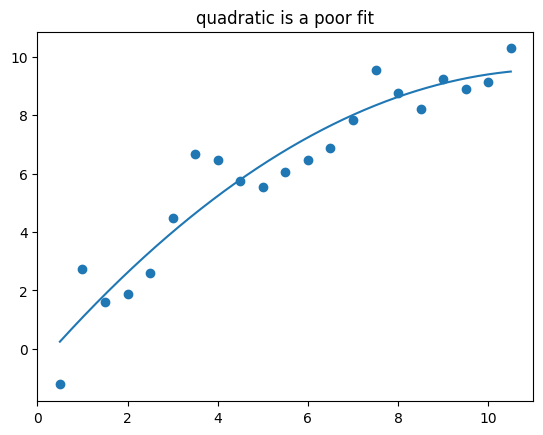

In [12]:
## fit quadratic 
ones = np.ones(n) 
t = df['t']
t2 = np.square(df['t'])
x = np.stack((ones, t, t2), axis=1) # design matrix 
y = np.log(df['btc-usd'])
model = np.linalg.lstsq(x, y)

## predict quadratic 
tt = np.linspace(t[0], t[n-1], 1000)
b = model[0]
yy = (tt**0)*b[0] + tt*b[1] + (tt**2)*b[2]

fig, ax = plt.subplots()
print('quadratic is a poor fit')
plt.title('quadratic is a poor fit')
ax.scatter(df['t'], np.log(df['btc-usd'])) # prices 
ax.plot(tt, yy) # quadratic 
plt.show()

log is imperfect


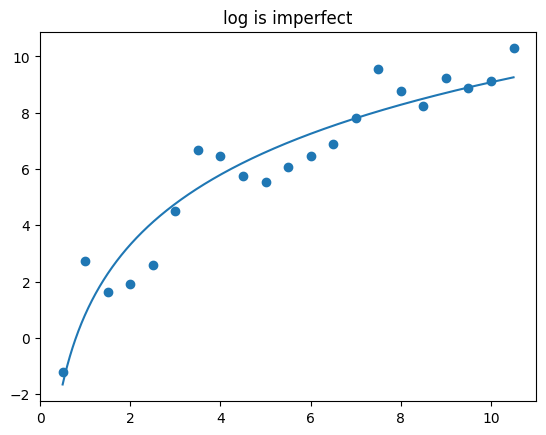

In [20]:
## try log

ones = np.ones(n) 
t = df['t']
t_log = np.log(df['t'])
x = np.stack((ones, t_log), axis=1) # design matrix 
y = np.log(df['btc-usd'])
model = np.linalg.lstsq(x, y)

## predict logs
tt = np.linspace(t[0], t[n-1], 1000)
b = model[0]
yy = (tt**0)*b[0] + np.log(tt)*b[1]

fig, ax = plt.subplots()
print('log is imperfect')
plt.title('log is imperfect')
ax.scatter(df['t'], np.log(df['btc-usd'])) # prices 
ax.plot(tt, yy) # log
plt.show()



In [27]:
print(f'b0: {b[0]}, b1: {b[1]}') 
np.exp(b[0] + np.log(2023 - 2011)*b[1]) 

b0: 0.8258295298803555, b1: 3.5864614857676185


16947.091837388965

square root looks perfect


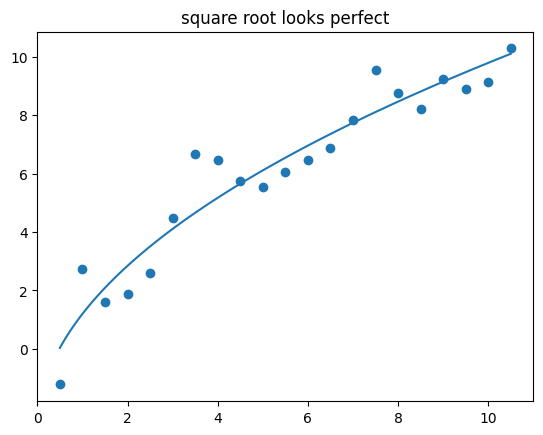

weights: [-2.77524837  3.97422749]


In [14]:
## try sqrt

ones = np.ones(n) 
t = df['t']
t_sqrt = np.sqrt(df['t'])
x = np.stack((ones, t_sqrt), axis=1) # design matrix 
y = np.log(df['btc-usd'])
model = np.linalg.lstsq(x, y)

## predict sqrt
tt = np.linspace(t[0], t[n-1], 1000)
b = model[0]
yy = (tt**0)*b[0] + (tt**0.5)*b[1]

fig, ax = plt.subplots()
print('square root looks perfect')
plt.title('square root looks perfect')
ax.scatter(df['t'], np.log(df['btc-usd'])) # prices 
ax.plot(tt, yy) # sqrt 
plt.show()

print('weights: '+str(b))



predictions per year, at Jan, 2022 through 2030:
[  38741.24083455   69018.89755779  120203.14394614  205160.15801934
  343868.89620303  566978.58286517  920986.38352464 1475711.10119232
 2334998.32713786]
square plot with predictions


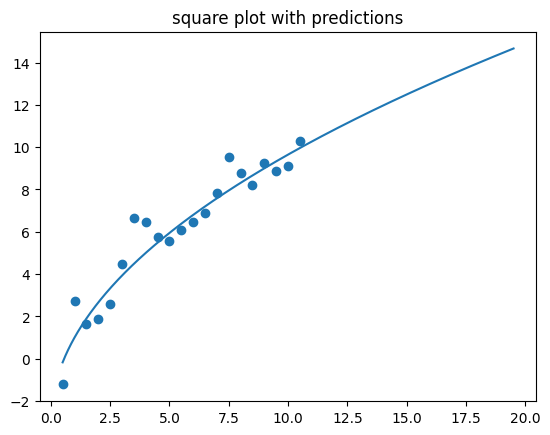

In [15]:
## define a predictive function
def pred(t):
    return np.exp(-3. + 4.*np.sqrt(t))

print('predictions per year, at Jan, 2022 through 2030:')
ttt = [t+.5 for t in range(11, 20)]
print(pred(ttt))

## plot predictions

ttt = np.linspace(t[0], 19.5, 1000) 
yyy = pred(ttt) 

fig, ax = plt.subplots()
print('square plot with predictions')
plt.title('square plot with predictions')
ax.scatter(df['t'], np.log(df['btc-usd'])) # prices 
ax.plot(ttt, np.log(yyy)) # sqrt 
plt.show()